# Covid Rapid Data visualisation

_For any body that wans to playaround with the data (btw. the url to the CSV is update, daily)_


## Imports

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


## Load Data (seperate Cell not to call the service to often)

In [108]:
df = pd.read_csv("https://www.ecdc.europa.eu/sites/default/files/documents/COVID-19-geographic-disbtribution-worldwide.csv")

 ## Filter only interesting entries

In [109]:
df1 = df.copy()

# Convert -> Date column to python DateTime Type, so that filtering works
df1['DateRep']= pd.to_datetime(df1['DateRep'], format='%d/%m/%Y') 

# Since in AT it started more or less on 1st of March
start_date = datetime.strptime('2020-02-29','%Y-%m-%d')

df1 = df1[(df1["DateRep"] > start_date) & (df1["GeoId"] == 'AT')]
df1.dropna()
df1.head(10)


,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018
378,2020-03-25,25,3,2020,796,5,Austria,AT,8847037.0
379,2020-03-24,24,3,2020,855,9,Austria,AT,8847037.0
380,2020-03-23,23,3,2020,607,8,Austria,AT,8847037.0
381,2020-03-22,22,3,2020,375,2,Austria,AT,8847037.0
382,2020-03-21,21,3,2020,453,0,Austria,AT,8847037.0
383,2020-03-20,20,3,2020,550,2,Austria,AT,8847037.0
384,2020-03-19,19,3,2020,314,1,Austria,AT,8847037.0
385,2020-03-18,18,3,2020,316,0,Austria,AT,8847037.0
386,2020-03-17,17,3,2020,156,2,Austria,AT,8847037.0
387,2020-03-16,16,3,2020,205,0,Austria,AT,8847037.0


## Reverse data entries & Create cumulated values for the day

Since each entry is the numbers of deaths / cases reported per day you need to cumulate the data to have the dayly totals. _(I had triped ofer this, but thanks to **matlibplot** I caught bug this soon)_


In [110]:

df1 = df1.reindex(index=df1.index[::-1])

df1['cumCases'] = df1['Cases'].cumsum()
df1['cumDeaths'] = df1['Deaths'].cumsum()

df1.head(10)


,DateRep,Day,Month,Year,Cases,Deaths,Countries and territories,GeoId,Pop_Data.2018,cumCases,cumDeaths
402,2020-03-01,1,3,2020,3,0,Austria,AT,8847037.0,3,0
401,2020-03-02,2,3,2020,4,0,Austria,AT,8847037.0,7,0
400,2020-03-03,3,3,2020,4,0,Austria,AT,8847037.0,11,0
399,2020-03-04,4,3,2020,6,0,Austria,AT,8847037.0,17,0
398,2020-03-05,5,3,2020,5,0,Austria,AT,8847037.0,22,0
397,2020-03-06,6,3,2020,12,0,Austria,AT,8847037.0,34,0
396,2020-03-07,7,3,2020,33,0,Austria,AT,8847037.0,67,0
395,2020-03-08,8,3,2020,25,0,Austria,AT,8847037.0,92,0
394,2020-03-09,9,3,2020,3,0,Austria,AT,8847037.0,95,0
393,2020-03-10,10,3,2020,29,0,Austria,AT,8847037.0,124,0


## Create Plot of the timeline

Both series in one Chart

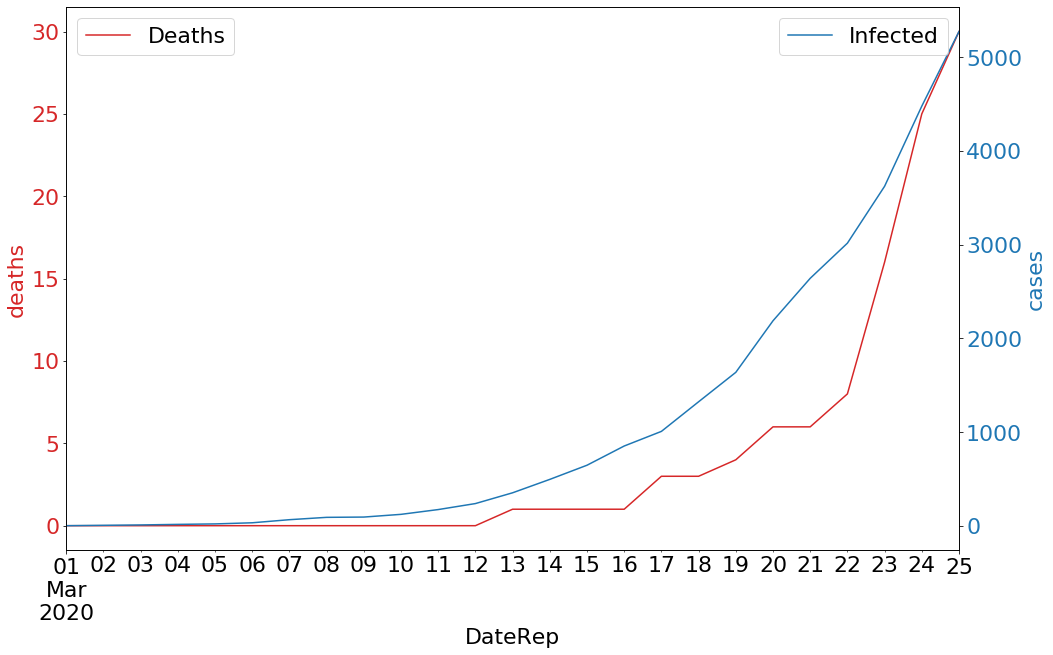

In [111]:

# Basic Plot setup
plt.rcParams.update({'font.size': 22})

fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

colorDeaths = 'tab:red'
colorInfected = 'tab:blue'

ax1.set_xlabel('timeline')
ax1.set_ylabel('deaths', color=colorDeaths)
ax1.tick_params(axis='y', labelcolor=colorDeaths)

ax2.set_ylabel('cases', color=colorInfected) 
ax2.tick_params(axis='y', labelcolor=colorInfected)

df1.plot(kind='line',x='DateRep',y='cumDeaths', color=colorDeaths, ax=ax1)
df1.plot(kind='line',x='DateRep',y='cumCases', color=colorInfected,ax=ax2)

ax1.legend(["Deaths"], loc=2)
ax2.legend(["Infected"],loc=1)

plt.show()

## To Compare progression in Italy

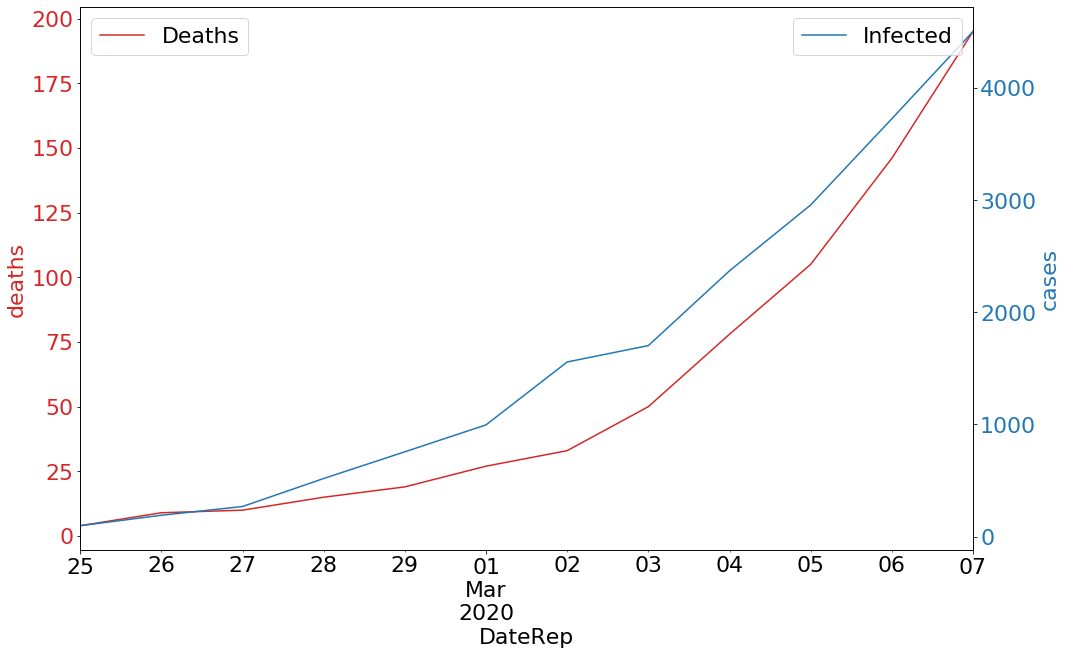

24.0


In [112]:
df_it = df.copy()
df_it['DateRep']= pd.to_datetime(df_it['DateRep'], format='%d/%m/%Y')

# Timeline length for AT
timeline_length_in_days = abs(( df1["DateRep"].values[0] - df1["DateRep"].values[-1])).astype('timedelta64[D]') / pd.np.timedelta64(1, 'D')

# Since in IT it started more or less on 24th of February
start_date = datetime.strptime('2020-02-24','%Y-%m-%d')

# and we just want to compare more same timeframe
end_date = start_date + timedelta(days=timeline_length_in_days/2 + 1)

df_it = df_it[(df_it["DateRep"] > start_date) & (df_it["DateRep"] < end_date) & (df_it["GeoId"] == 'IT')]
df_it.dropna()

df_it = df_it.reindex(index=df_it.index[::-1])

df_it['cumCases'] = df_it['Cases'].cumsum()
df_it['cumDeaths'] = df_it['Deaths'].cumsum()


# Basic Plot setup
plt.rcParams.update({'font.size': 22})

fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

colorDeaths = 'tab:red'
colorInfected = 'tab:blue'

ax1.set_xlabel('timeline')
ax1.set_ylabel('deaths', color=colorDeaths)
ax1.tick_params(axis='y', labelcolor=colorDeaths)

ax2.set_ylabel('cases', color=colorInfected) 
ax2.tick_params(axis='y', labelcolor=colorInfected)

df_it.plot(kind='line',x='DateRep',y='cumDeaths', color=colorDeaths, ax=ax1)
df_it.plot(kind='line',x='DateRep',y='cumCases', color=colorInfected,ax=ax2)

ax1.legend(["Deaths"], loc=2)
ax2.legend(["Infected"],loc=1)

plt.show()

print(timeline_length_in_days)

In [113]:
abs(( df1["DateRep"].values[0] - df1["DateRep"].values[-1])).astype('timedelta64[D]').astype(int)
# print(df1["DateRep"].values[0].dtype)

24

## (My extrem basic) Conclusion

It seems the fear and lockdown seems to have halfed the timeline of the infection rate.  
* in IT needed under 2 weeks to reach 5000 Infected, with a higher mortality
* in AT it took more than 3 weeks, with a lower slope. I as use less infections more chance to for the infected to get treatment in time.

**My recomendation:** Follow the rules / advice of the Goverment / Healthofficals / Common Sence, think on your loved ones and of cource yourself. AND minimize the infection vectors if possible, until it's over.